In [ ]:
# works on numpy 1.23.5, scikit-learn 1.2.0 and matplotlib 3.6.2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

In [3]:
# set seed
random.seed(100)

# data setup
eight = np.array(([-3, -2, -2, -2, 1, 1, 2, 4], [0, 4, -1, -2, 4, 2, -4, -3])).T
eight = eight[[7, 6, 2, 0, 3, 1, 5, 4], :]

# function to plot
def plot_clusters(points, centers, labels, title, connect_centers=True):
    fig, ax = plt.subplots(figsize=(10, 10))

    # cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], c="w", edgecolor="black", zorder=10)
    
    # lines from each point to its center
    for i in range(len(points)):
        ax.plot([points[i, 0], centers[labels[i], 0]], 
                [points[i, 1], centers[labels[i], 1]], 
                c="black")

    # conditionally draw a line connecting the two cluster centers
    if connect_centers:
        ax.plot([centers[0, 0], centers[1, 0]], 
                [centers[0, 1], centers[1, 1]], 
                c="black")

    # data point with labels
    for i in range(len(points)):
        ax.scatter(points[i, 0], points[i, 1], c="w", edgecolor="black", s=300, zorder=10)
        ax.text(points[i, 0], points[i, 1], str(i + 1), zorder=15,
                horizontalalignment='center', verticalalignment='center', c="r", fontsize=12)


    ax.set_xlabel("price consciousness")
    ax.set_ylabel("brand loyalty")
    plt.title(title)
    plt.show()


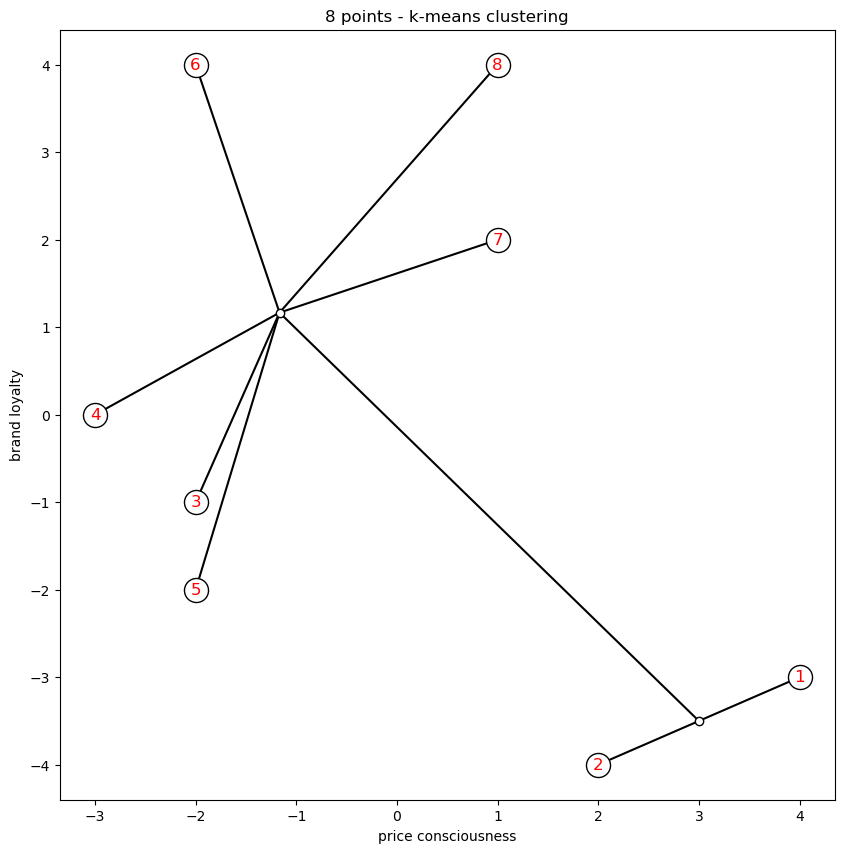

In [4]:
# K-Means Clustering
initial_centers_kmeans = np.array([[-3, 0], [4, -3]])
kmeans = KMeans(n_clusters=2, init=initial_centers_kmeans, n_init=1, random_state=100)
kmeans.fit(eight)
plot_clusters(eight, kmeans.cluster_centers_, kmeans.labels_, "8 points - k-means clustering")

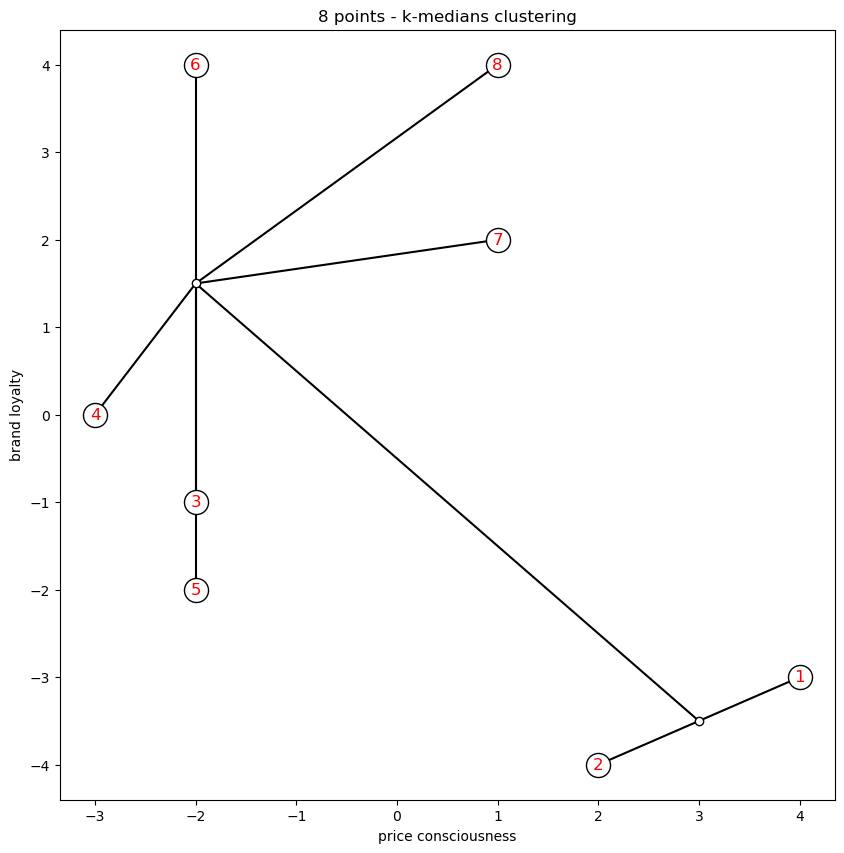

In [5]:
# K-Medians Clustering with fixed initial medians
initial_medians = np.array([[-3, 0], [4, -3]])
kmedians_instance = kmedians(eight, initial_medians)
kmedians_instance.process()
medians = np.array(kmedians_instance.get_medians())

# map cluster labels for plotting
labels_kmedians = np.zeros(eight.shape[0], dtype=int)
for i, cluster in enumerate(kmedians_instance.get_clusters()):
    labels_kmedians[cluster] = i
    
plot_clusters(eight, medians, labels_kmedians, "8 points - k-medians clustering")

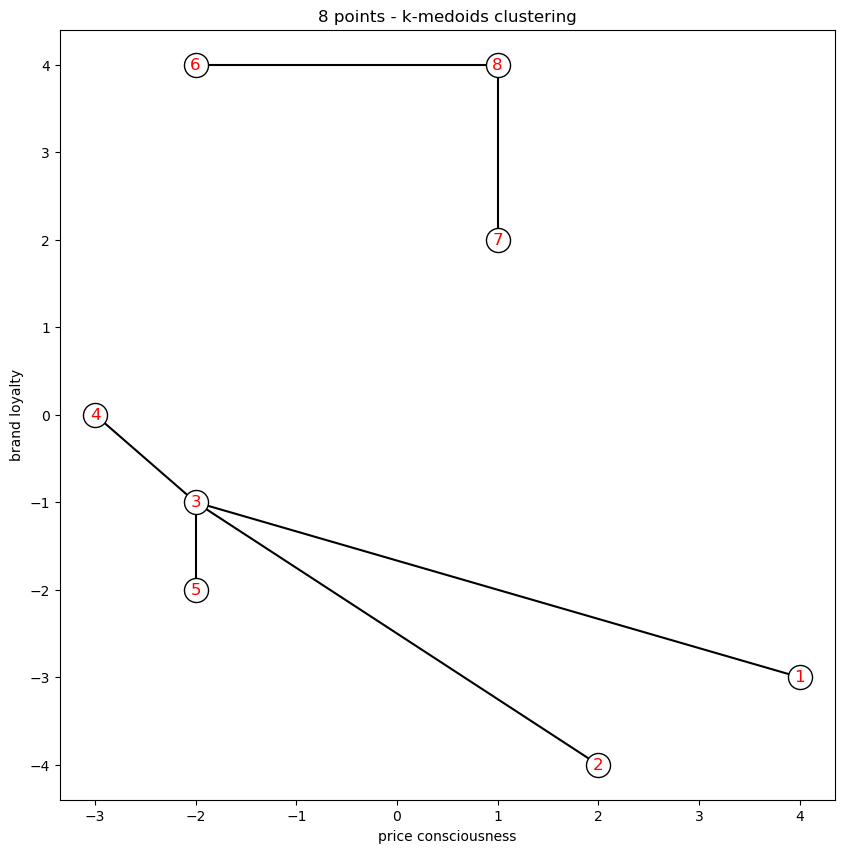

In [6]:
# K-Medoids Clustering with fixed initial medoids
initial_medoids = [0, 4]
metric = distance_metric(type_metric.MANHATTAN)
kmedoids_instance = kmedoids(eight, initial_medoids, metric=metric)
kmedoids_instance.process()
medoids = np.array([eight[medoid] for medoid in kmedoids_instance.get_medoids()])

# map cluster labels for plotting
labels_kmedoids = np.zeros(eight.shape[0], dtype=int)
for i, cluster in enumerate(kmedoids_instance.get_clusters()):
    labels_kmedoids[cluster] = i
    
plot_clusters(eight, medoids, labels_kmedoids, "8 points - k-medoids clustering", connect_centers=False)